# Page Rank

## Latihan Page Rank

In [ ]:
import numpy as np

def pagerank(adj_matrix, d=0.85, max_iter=100, tol=1e-6):
    """
    Hitung PageRank dari matriks adjacency.

    Parameters:
        adj_matrix : array-like, shape (n, n)
            Matriks adjacency (1 jika ada link i -> j)
        d : float
            Damping factor (default: 0.85)
        max_iter : int
            Maksimum iterasi
        tol : float
            Toleransi konvergensi

    Returns:
        r : ndarray, shape (n,)
            Vektor PageRank
    """
    adj = np.array(adj_matrix, dtype=float)
    n = adj.shape[0]

    # Tangani dangling nodes (baris dengan jumlah 0)
    out_degree = np.sum(adj, axis=1)
    for i in range(n):
        if out_degree[i] == 0:
            adj[i, :] = 1.0  # taut ke semua halaman

    # Normalisasi baris → jadi matriks transisi (baris jumlah = 1)
    # TAPI: PageRank asli menggunakan TRANSPOSE → aliran masuk
    # Jadi kita transpos untuk membuat kolom = out-link
    M = adj / np.sum(adj, axis=1, keepdims=True)
    M = M.T  # Sekarang M[j,i] = probabilitas dari i ke j

    # Inisialisasi
    r = np.ones(n) / n
    teleport = (1 - d) / n

    for _ in range(max_iter):
        r_new = d * M @ r + teleport
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new

    return r

# Contoh penggunaan
if __name__ == "__main__":
    # Graf: 0 → 1, 0 → 2, 1 → 2, 2 → 0
    A = [
        [0, 1, 1],  # 0 links to 1 and 2
        [0, 0, 1],  # 1 links to 2
        [1, 0, 0],  # 2 links to 0
    ]

    pr = pagerank(A)
    print("PageRank:")
    for i, score in enumerate(pr):
        print(f"Node {i}: {score:.4f}")


PageRank:
Node 0: 0.3878
Node 1: 0.2148
Node 2: 0.3974


In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 0)])

pr = nx.pagerank(G, alpha=0.85)
print(pr)


{0: 0.387789442707259, 1: 0.21481051315058508, 2: 0.3974000441421556}


## Page Rank menggunakan data dari yang diberikan di kelas

✅ Berhasil membaca file: web-Google_10k.txt
Jumlah node: 10000
Jumlah edge: 78323

🏆 Top 5 PageRank tertinggi:
        Node  PageRank
994   486980  0.006515
3849  285814  0.004633
113   226374  0.003301
2847  163075  0.003288
5214  555924  0.002756


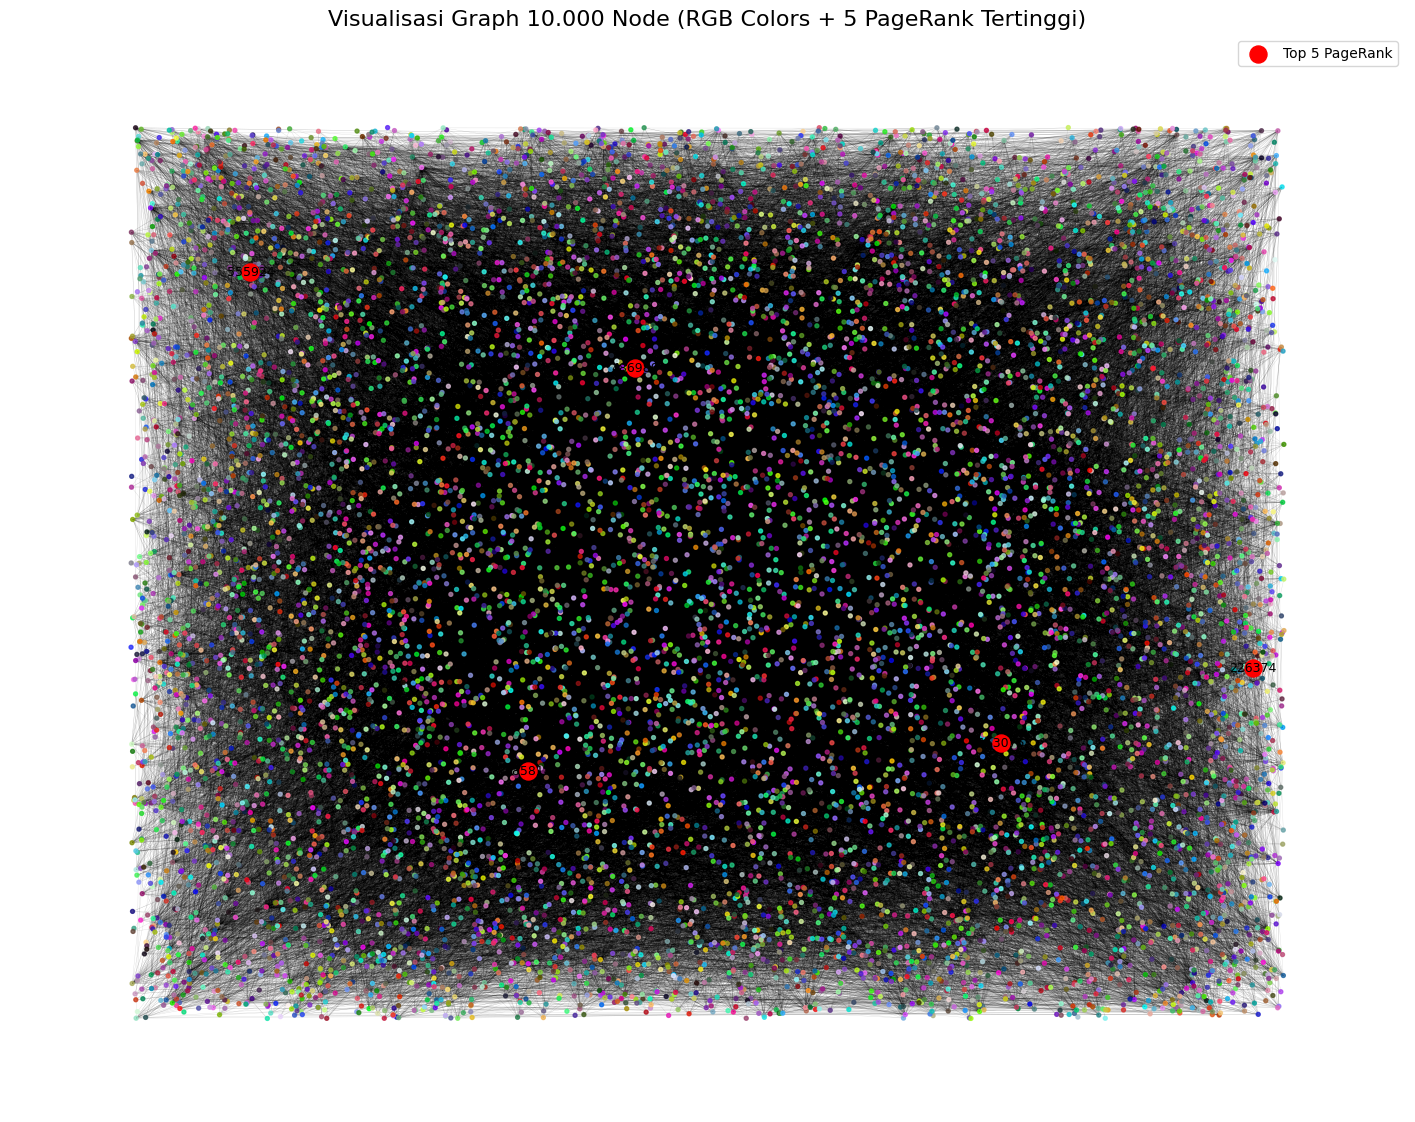

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# === 1️⃣ Baca file edgelist ===
file_name = 'web-Google_10k.txt'

try:
    G = nx.read_edgelist(
        file_name,
        comments='#',
        create_using=nx.DiGraph(),
        nodetype=int
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

# === 2️⃣ Hitung PageRank ===
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"]).sort_values("PageRank", ascending=False)

# === 3️⃣ Ambil 5 node dengan PageRank tertinggi ===
top5_nodes = pagerank_df.head(5)["Node"].tolist()
print("\n🏆 Top 5 PageRank tertinggi:")
print(pagerank_df.head(5))

# === 4️⃣ Layout dan warna ===
np.random.seed(42)  # agar warna konsisten tiap run
pos = nx.random_layout(G)  # layout ringan untuk graf besar
node_colors = np.random.rand(len(G.nodes()), 3)  # RGB acak untuk semua node

# === 5️⃣ Visualisasi ===
plt.figure(figsize=(18, 14))

# Semua node (warna-warni acak)
nx.draw_networkx_nodes(
    G, pos,
    node_size=8,
    node_color=node_colors,
    alpha=0.8
)

# 5 node penting (warna merah, ukuran besar)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    node_size=150,
    label="Top 5 PageRank"
)

# Garis edge abu-abu muda agar tidak berat
nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.15, arrows=False)

# Label hanya untuk 5 node penting
labels = {n: str(n) for n in top5_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color="black", font_size=9)

plt.title("Visualisasi Graph 10.000 Node (RGB Colors + 5 PageRank Tertinggi)", fontsize=16)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()

## Page Rank menggunakan data keluaran link teknik informatika

In [ ]:
# BAGIAN 1: Import Library dan Baca File
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'semua_link_informatika2.csv'

try:
    # Baca file CSV tanpa header (diasumsikan 2 kolom: source & target)
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di dalam.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")

✅ Berhasil membaca file: semua_link_informatika2.csv
Jumlah node: 1681
Jumlah edge: 1653


In [2]:
# BAGIAN 2: Periksa isi dataset dan jumlah edge
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())

Jumlah edges: 1653
                              FromNodeId  \
﻿1  https://informatika.trunojoyo.ac.id/   
2   https://informatika.trunojoyo.ac.id/   
3   https://informatika.trunojoyo.ac.id/   
4   https://informatika.trunojoyo.ac.id/   
5   https://informatika.trunojoyo.ac.id/   

                                             ToNodeId  
﻿1               https://informatika.trunojoyo.ac.id/  
2   https://informatika.trunojoyo.ac.id/bidang-min...  
3   https://informatika.trunojoyo.ac.id/bidang-min...  
4   https://informatika.trunojoyo.ac.id/bidang-min...  
5   https://informatika.trunojoyo.ac.id/bidang-min...  


In [3]:
#  BAGIAN 3: Buat Graph dari edges
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(int)
    edges["ToNodeId"] = edges["ToNodeId"].astype(int)
except:
    pass  # kalau bukan angka, biarkan string

G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 130
Jumlah edge dalam graph: 1492


In [4]:
#  BAGIAN 4: Hitung PageRank dan cari node penting
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))

🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0               https://informatika.trunojoyo.ac.id/  0.010508
1  https://informatika.trunojoyo.ac.id/prestasi-m...  0.010508
2  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508
3  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508
4  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508


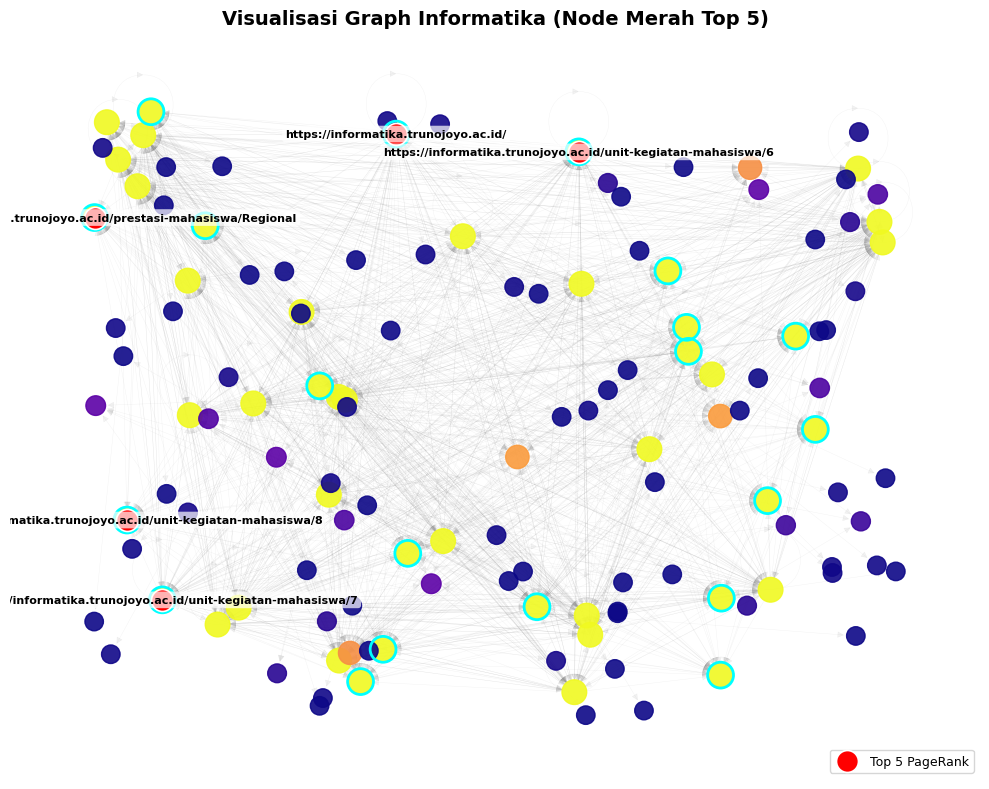

In [5]:
# CELL 5: Visualisasi Graph Informatika (Warna Cerah, Outline Kontras - Versi Ringkas)

import matplotlib.pyplot as plt
import networkx as nx

# Tutup figure sebelumnya jika masih aktif
plt.close('all')

# Ukuran figure lebih kecil
fig, ax = plt.subplots(figsize=(10, 8))

# Layout ringan tapi stabil
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 30000 for v in pagerank.values()]  # sebelumnya 50000 → diperkecil

# Ambil Top 5 & Top 20 berdasarkan PageRank
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# =========================
# Gambar Semua Node (Gradasi)
# =========================
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.9,
    ax=ax
)

# =========================
# Outline untuk Top 20 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*33000 for n in top20_nodes],  # sebelumnya 55000
    node_color='none',
    edgecolors="#00FFFF",
    linewidths=2,
    ax=ax
)

# =========================
# Node Merah untuk Top 5 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    edgecolors="white",
    linewidths=1.2,
    node_size=250,  # sebelumnya 350
    label='Top 5 PageRank',
    ax=ax
)

# =========================
# Edge (transparan tipis)
# =========================
nx.draw_networkx_edges(
    G, pos,
    alpha=0.1,
    width=0.3,
    edge_color="gray",
    ax=ax
)

# =========================
# Label untuk Top 5 Node
# =========================
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color="black",
    font_size=8,
    font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"),
    ax=ax
)

# =========================
# Tampilan Akhir
# =========================
ax.set_title(
    "Visualisasi Graph Informatika (Node Merah Top 5)",
    fontsize=14, fontweight="bold", pad=10
)
ax.legend(scatterpoints=1, fontsize=9, loc="lower right")
ax.axis("off")

plt.tight_layout()
plt.show(block=True)
plt.close(fig)


###

## Page Rank Menggunakan Data Link Berita

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'tempo_links2.csv'

try:
    # Baca file CSV tanpa header (diasumsikan 2 kolom: source & target)
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di dalam'.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")

✅ Berhasil membaca file: tempo_links2.csv
Jumlah node: 945
Jumlah edge: 900


In [3]:
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())

Jumlah edges: 900
                                                 FromNodeId  \
﻿2084903  https://www.tempo.co/indeks?page=1&category=ru...   
2084893   https://www.tempo.co/indeks?page=1&category=ru...   
2084880   https://www.tempo.co/indeks?page=1&category=ru...   
2084862   https://www.tempo.co/indeks?page=1&category=ru...   
2084860   https://www.tempo.co/indeks?page=1&category=ru...   

                                                   ToNodeId  
﻿2084903  https://www.tempo.co/politik/kemang-tak-bisa-d...  
2084893   https://www.tempo.co/politik/dasco-ungkap-alas...  
2084880   https://www.tempo.co/politik/nama-soeharto-seb...  
2084862   https://www.tempo.co/politik/istana-jelaskan-k...  
2084860   https://www.tempo.co/politik/banjir-di-jakarta...  


In [4]:
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(str)
    edges["ToNodeId"] = edges["ToNodeId"].astype(str)
except:
    pass

# Buat graph berarah
G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 945
Jumlah edge dalam graph: 900


In [5]:
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))

🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0  https://www.tempo.co/hiburan/zaman-makin-maju-...   0.00106
1  https://www.tempo.co/internasional/15-negara-k...   0.00106
2  https://www.tempo.co/internasional/top-3-dunia...   0.00106
3  https://www.tempo.co/internasional/warga-malay...   0.00106
4  https://www.tempo.co/internasional/peringati-7...   0.00106


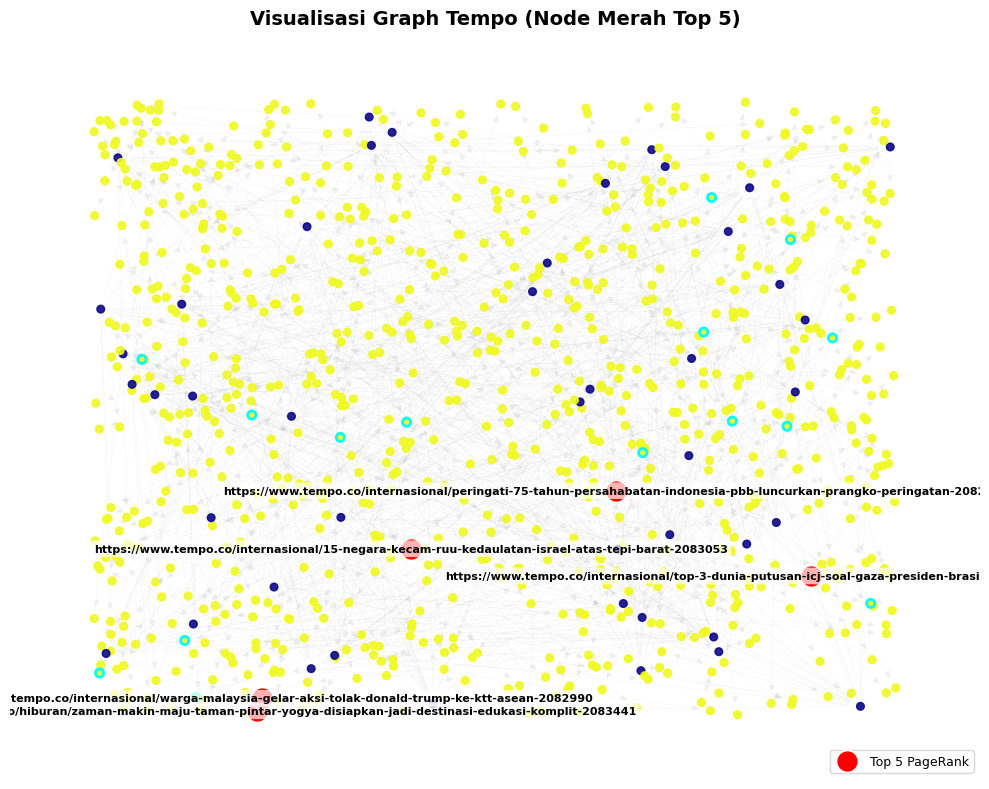

In [7]:
# CELL 5: Visualisasi Graph Informatika (Warna Cerah, Outline Kontras - Versi Ringkas)

import matplotlib.pyplot as plt
import networkx as nx

# Tutup figure sebelumnya jika masih aktif
plt.close('all')

# Ukuran figure lebih kecil
fig, ax = plt.subplots(figsize=(10, 8))

# Layout ringan tapi stabil
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 30000 for v in pagerank.values()]  # sebelumnya 50000 → diperkecil

# Ambil Top 5 & Top 20 berdasarkan PageRank
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# =========================
# Gambar Semua Node (Gradasi)
# =========================
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.9,
    ax=ax
)

# =========================
# Outline untuk Top 20 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*33000 for n in top20_nodes],  # sebelumnya 55000
    node_color='none',
    edgecolors="#00FFFF",
    linewidths=2,
    ax=ax
)

# =========================
# Node Merah untuk Top 5 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    edgecolors="white",
    linewidths=1.2,
    node_size=250,  # sebelumnya 350
    label='Top 5 PageRank',
    ax=ax
)

# =========================
# Edge (transparan tipis)
# =========================
nx.draw_networkx_edges(
    G, pos,
    alpha=0.1,
    width=0.3,
    edge_color="gray",
    ax=ax
)

# =========================
# Label untuk Top 5 Node
# =========================
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color="black",
    font_size=8,
    font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"),
    ax=ax
)

# =========================
# Tampilan Akhir
# =========================
ax.set_title(
    "Visualisasi Graph Tempo (Node Merah Top 5)",
    fontsize=14, fontweight="bold", pad=10
)
ax.legend(scatterpoints=1, fontsize=9, loc="lower right")
ax.axis("off")

plt.tight_layout()
plt.show(block=True)
plt.close(fig)
